In [144]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [146]:
#	Load the dataset .

In [148]:
df=pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [150]:
# The dataset consists of 450 rows and 13 columns. Here's an overview of the key columns:

# Date: Date of the transaction (object type).
# Day: Day of the week (object type).
# SKU: Product identifier (object type).
# City: Location of the sale (object type).
# Volume: Quantity of items sold (numerical, integer).
# BU: Business unit (object type).
# Brand: Brand name of the product (object type).
# Model: Product model (object type).
# Avg Price: Average price per unit (numerical, integer).
# Total Sales Value: Total sales before discounts (numerical, integer).
# Discount Rate (%): Discount percentage applied (numerical, float).
# Discount Amount: Amount discounted (numerical, float).
# Net Sales Value: Final sales value after applying discounts (numerical, float).

In [152]:
#Identify numerical columns in the dataset.

In [154]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [156]:
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [158]:
df[numerical_cols]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [160]:
#Calculate the mean, median, mode, and standard deviation for these columns.

In [162]:
mean_values=df[numerical_cols].mean()
mean_values

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [164]:
median_values=df[numerical_cols].median()
median_values

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [166]:
mode_values=df[numerical_cols].mode()
mode_values

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [168]:
mode_values=df[numerical_cols].mode().iloc[0]
mode_values

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [169]:
std_dev_values=df[numerical_cols].std()
std_dev_values

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [172]:
#lets combine  all values together 

df[numerical_cols].agg(['mean','median','std',lambda x:x.mode()[0]])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
<lambda>,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801


In [174]:
# for better readabilty,lets convert it into Dataframe.

basic_statistics=pd.DataFrame({'Mean': mean_values,
                        'Median': median_values,
                        'Mode': mode_values,
                        'Standard Deviation': std_dev_values})

In [176]:
basic_statistics

,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [178]:
# above we got mean, median,mode and standard devivation of all numeric colums.

# Data Visualisation

In [181]:
# i did two diffrent histogram plots

In [183]:
# 1. Histograms for each numerical columns

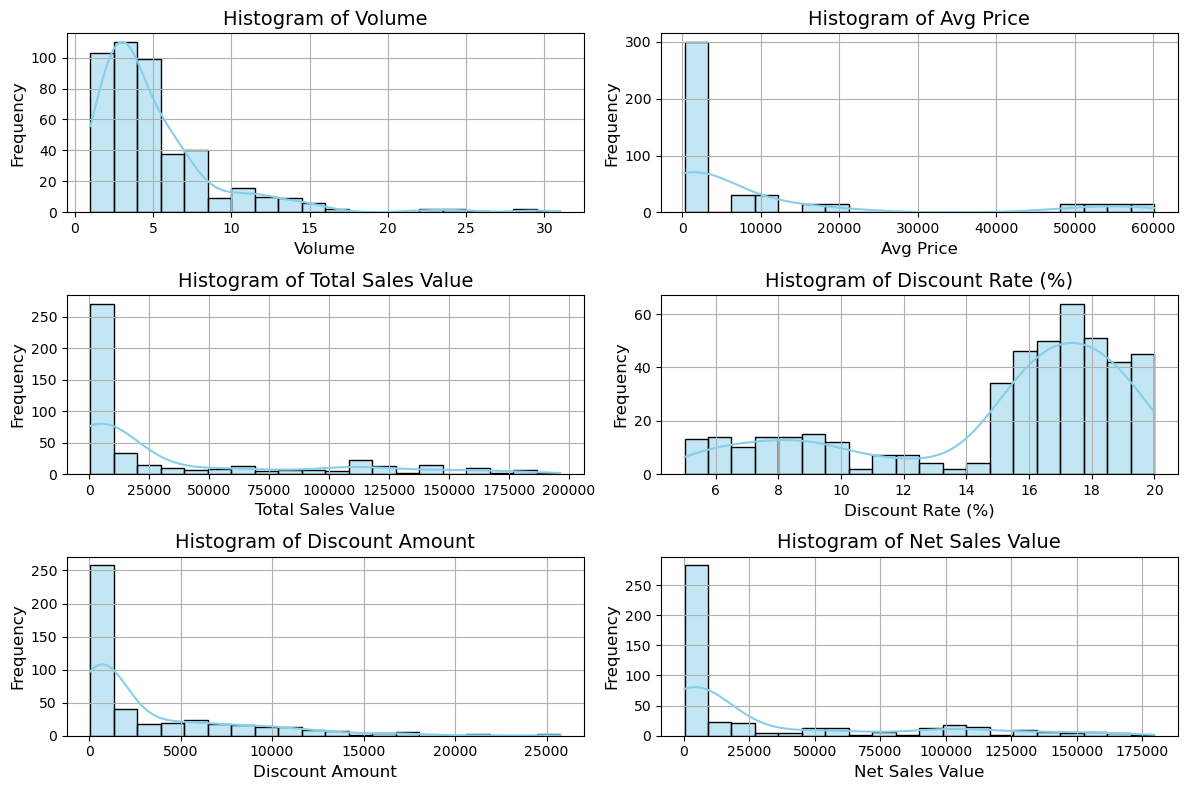

In [185]:
# first method:

# Set the number of columns for subplots
n_cols = 2
n_rows = 3 # Calculated required rows

plt.figure(figsize=(12, 8))  # Set the figure size

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot with dynamic rows
    sns.histplot(df[col], bins=20, color='skyblue', edgecolor='black',kde=True)  # Plot histogram
    plt.title(f'Histogram of {col}', fontsize=14)  # Title for each plot
    plt.xlabel(col, fontsize=12)  # X-axis label
    plt.ylabel('Frequency', fontsize=12)  # Y-axis label
    plt.grid(True)  # Add grid for better readability

plt.tight_layout()  # Adjust spacing between plots
plt.show()

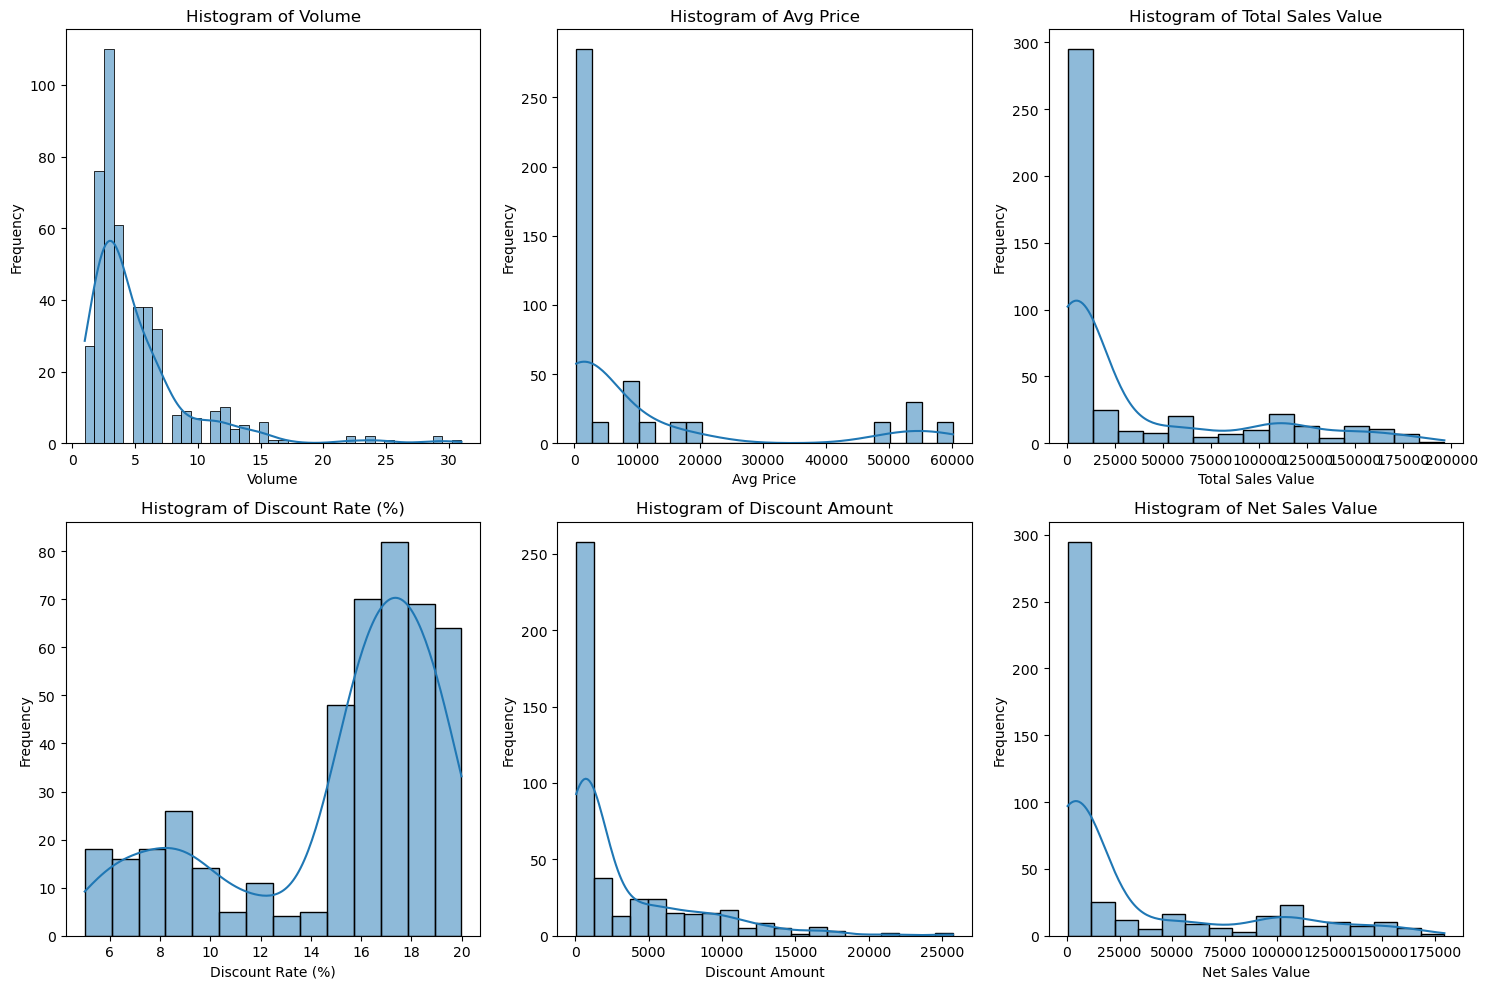

In [186]:
# Second Method

plt.figure(figsize=(15, 10))

# Histograms for each numerical column
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Handling Skewness and Outliers:
# Preprocessing also helps handle skewness and outliers in the data.

In [187]:
# Analysis of Histogram
# The tail on the right side is longer or fatter than the left side.
# The data is Right skewed tha means all datapoints are positive.
# You can call this as positive skewness

In [189]:
# Outliers

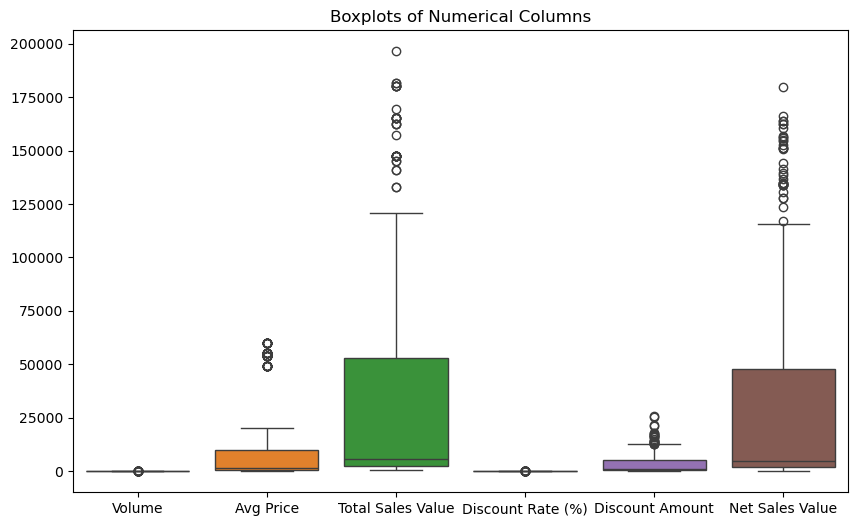

In [190]:
# Boxplots for numerical columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Columns')
plt.show()

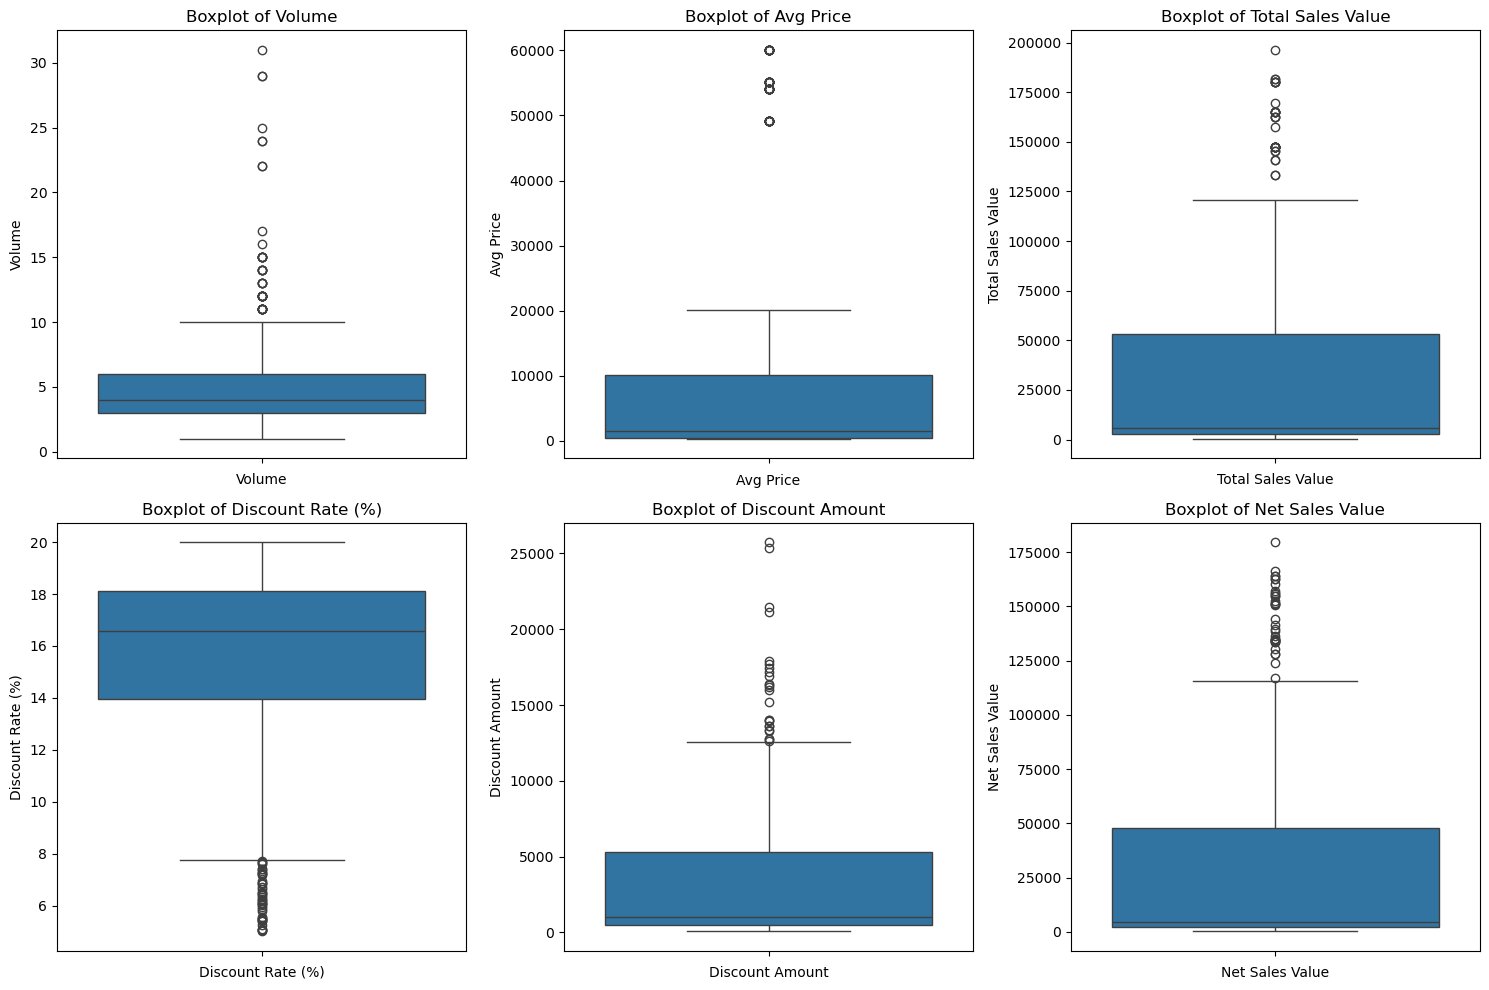

In [194]:
# Boxplot for each numercal colum
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [196]:
# As we can see outliers from boxplot of all numeric colums
# Avg Price,Total Sales value, Discount Amounts and Net Sales Value coloumns having more outliers.

In [199]:
# Detect the number of outliers

def identify_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify outliers for each numerical column
outlier_summary = {}
for col in numerical_cols:
    outliers = identify_outliers_iqr(df, col)
    outlier_summary[col] = outliers


# Print outlier counts for each column
print("Outlier Counts for Numerical Columns:")
for col, outliers in outlier_summary.items():
    print(f"{col}: {len(outliers)} outliers")

Outlier Counts for Numerical Columns:
Volume: 44 outliers
Avg Price: 60 outliers
Total Sales Value: 36 outliers
Discount Rate (%): 45 outliers
Discount Amount: 24 outliers
Net Sales Value: 35 outliers


In [ ]:
# Now we go for categorical colums

#	Bar Chart Analysis for Categorical Column:

In [203]:
# first identify the categorical coloums 
categorical_cols=df.select_dtypes(include=['O']).columns # o for object
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [205]:
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [104]:
df[categorical_cols]

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [189]:
# Bar Chart for categorical colums

In [271]:
df[column].value_counts()

Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners          15
W-Casuals         15
M- Inners         15
M- T Shirts       15
Gear BB Cream     15
Gear Shampoo      15
Gear Cream        15
Gear Oil          15
Vedic Oil         15
Babaji Cream      15
Babaji Shampoo    15
Vedic Shampoo     15
Vedic Cream       15
Babaji Oil        15
O-11              15
O-10              15
S-21              15
S-20              15
RU-9              15
YM-98             15
YM-99 Plus        15
YM-99             15
M-Shoes           15
Name: count, dtype: int64

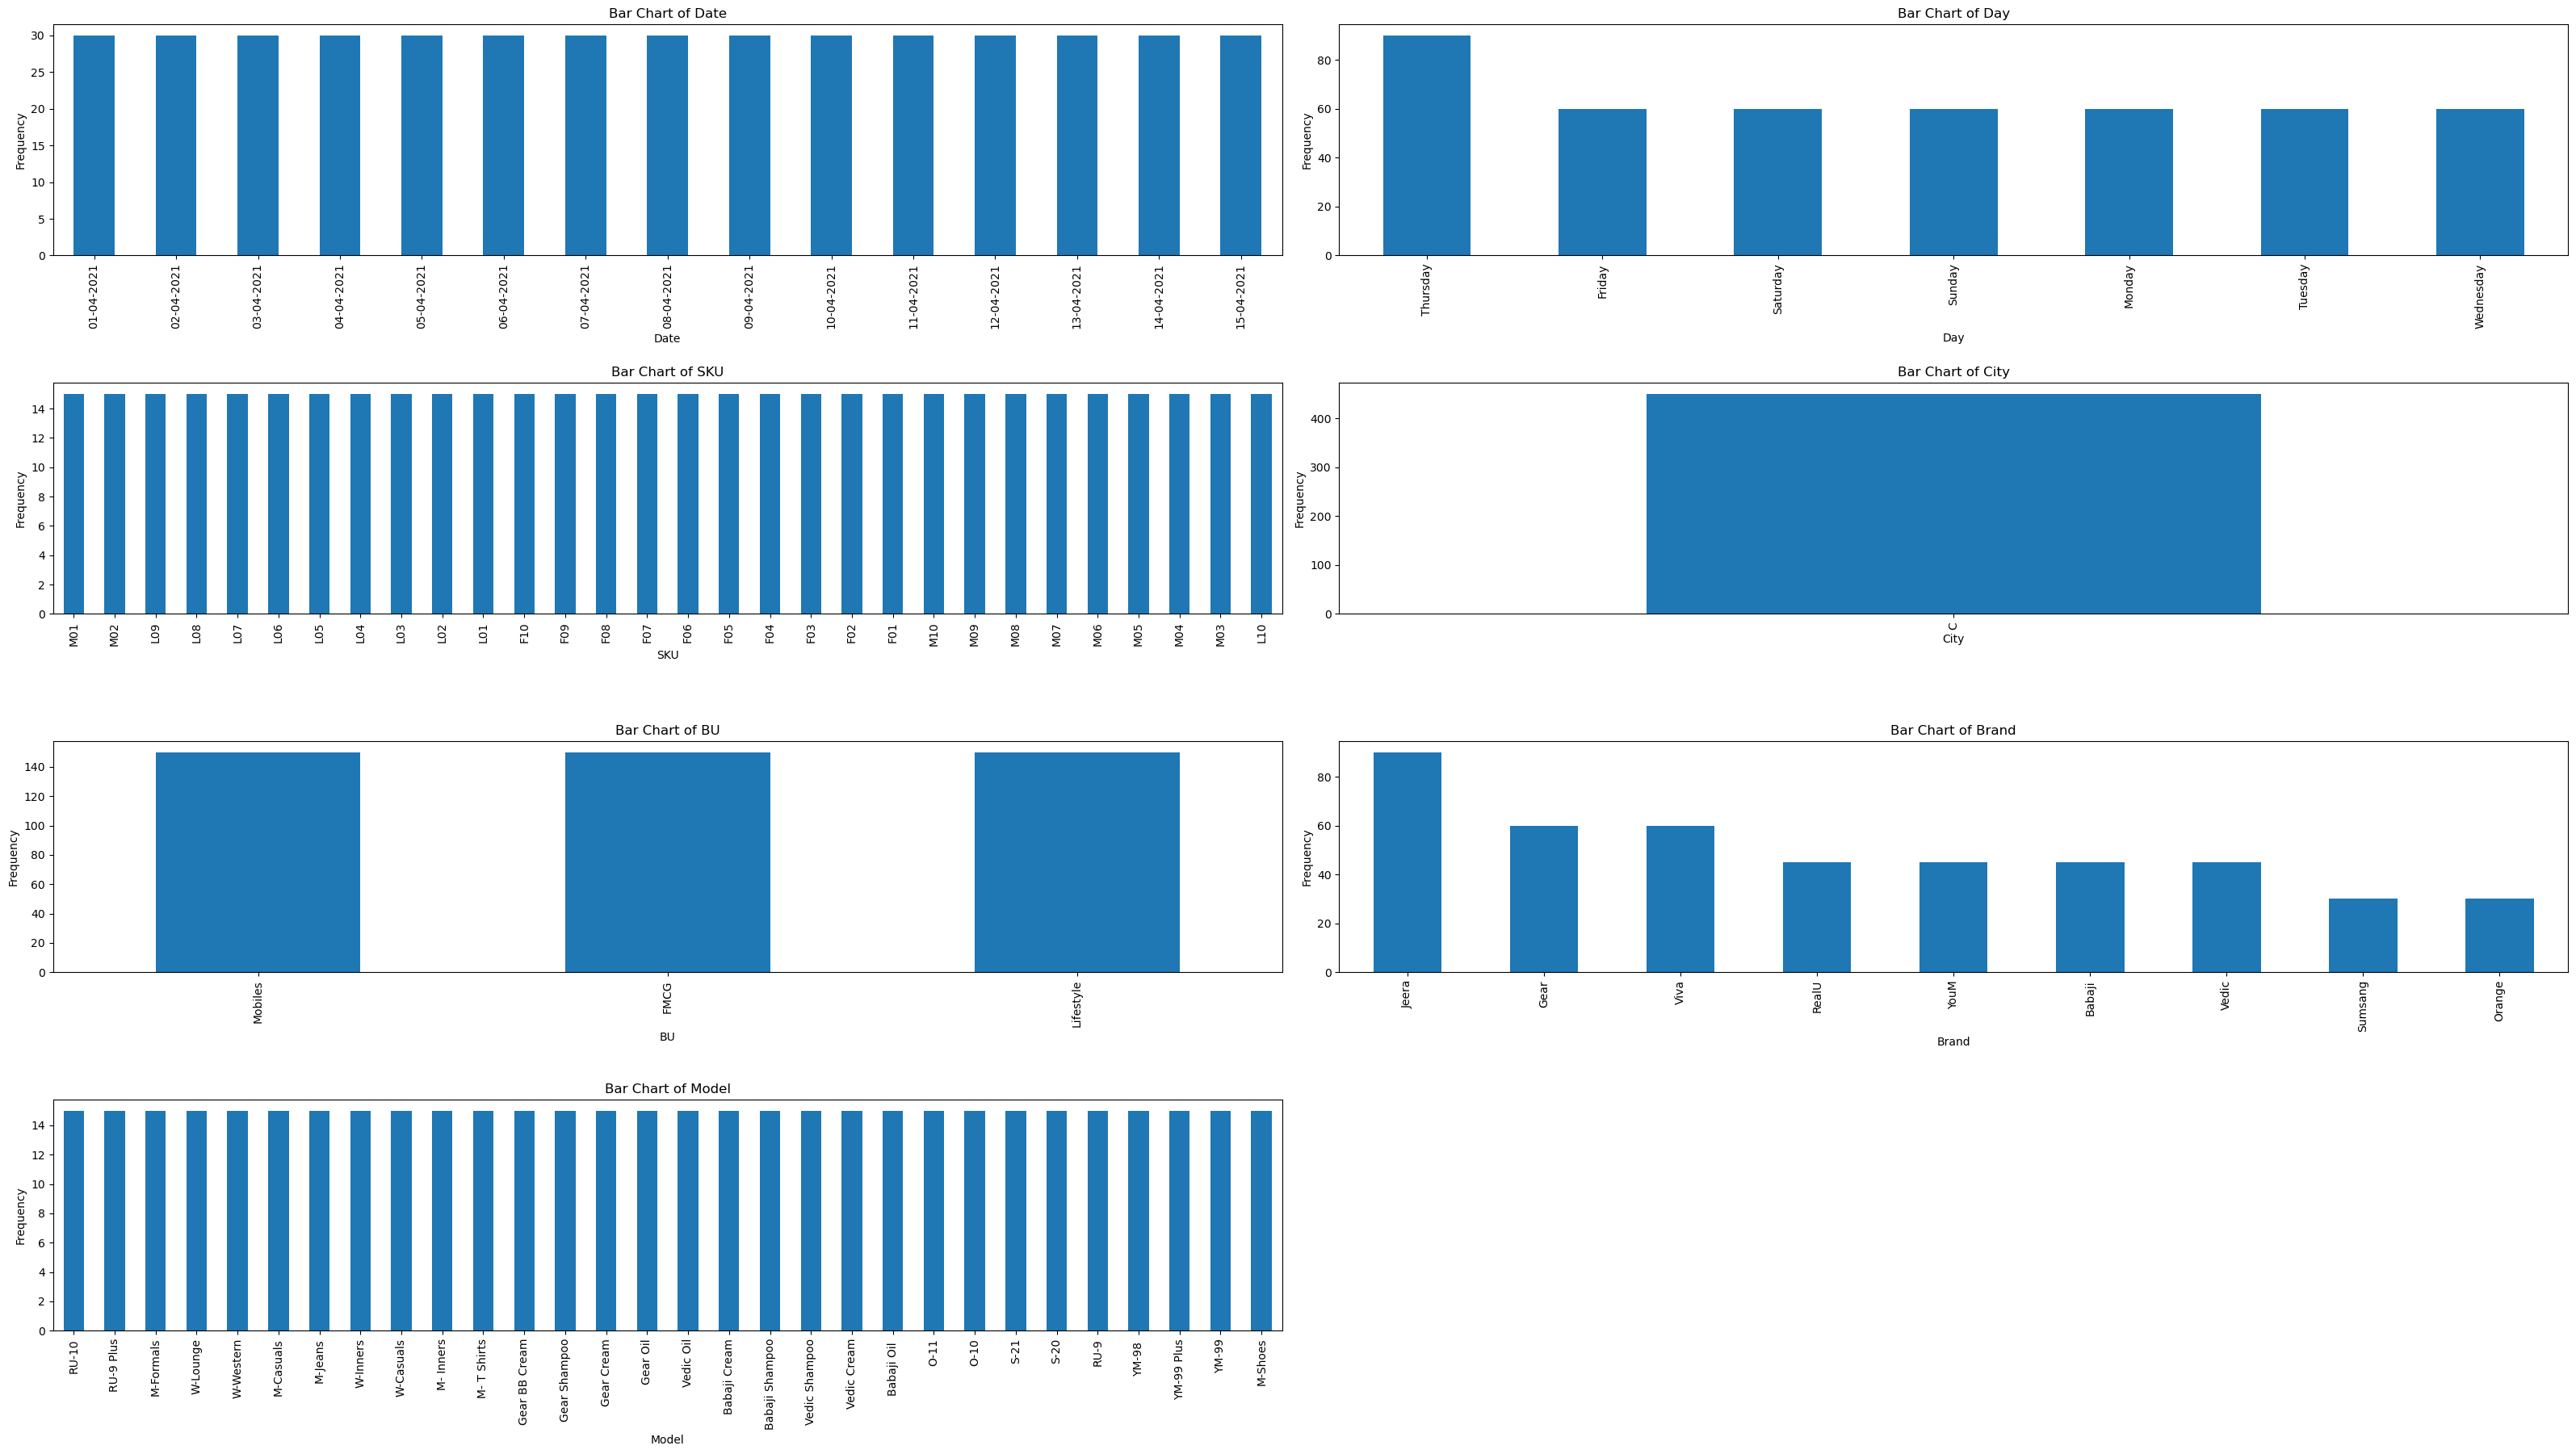

In [240]:

plt.figure(figsize=(32, 30))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2 , i)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

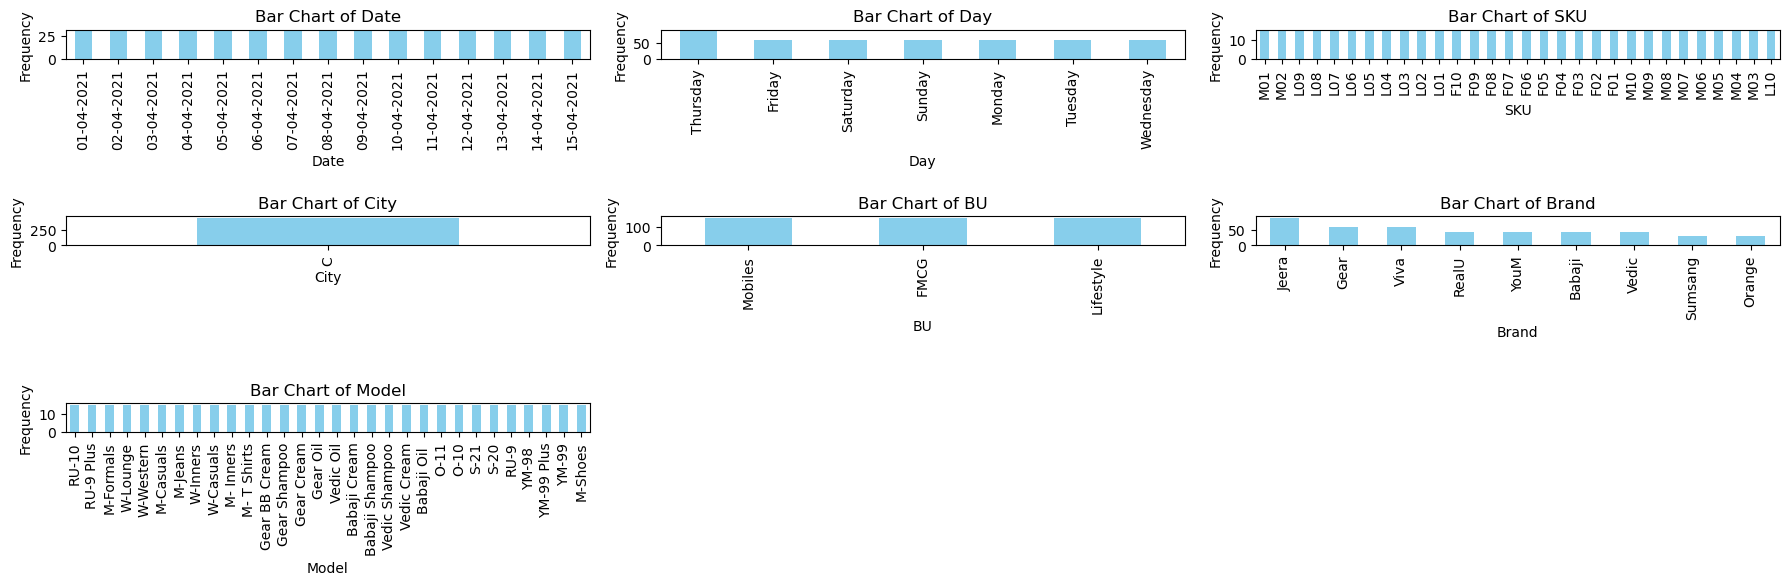

In [262]:
# Manually selected categorical columns based on the dataset
categorical_columns = ['Day', 'City', 'BU', 'Brand', 'Model']

# Set up the figure size
plt.figure(figsize=(18, 12))

# Plot bar charts for each categorical column
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 3, i)  # Creating subplots with 2 rows and 3 columns
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

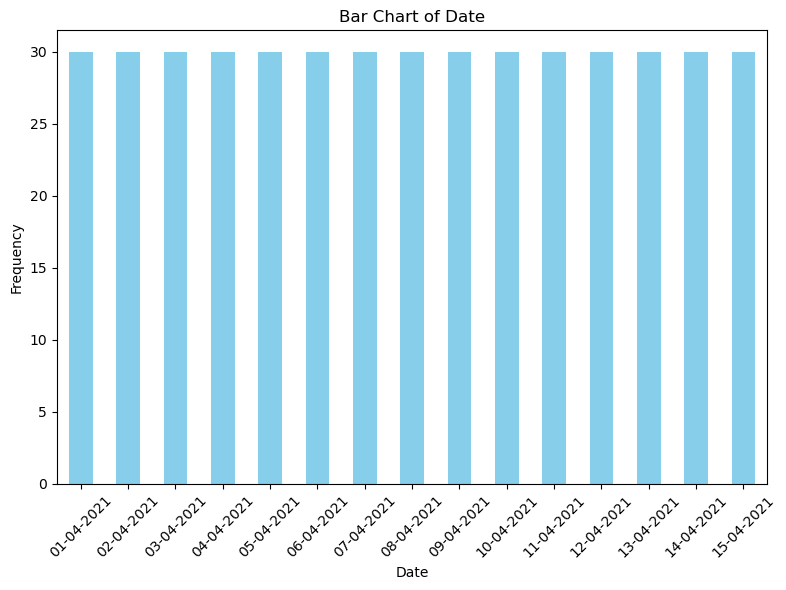

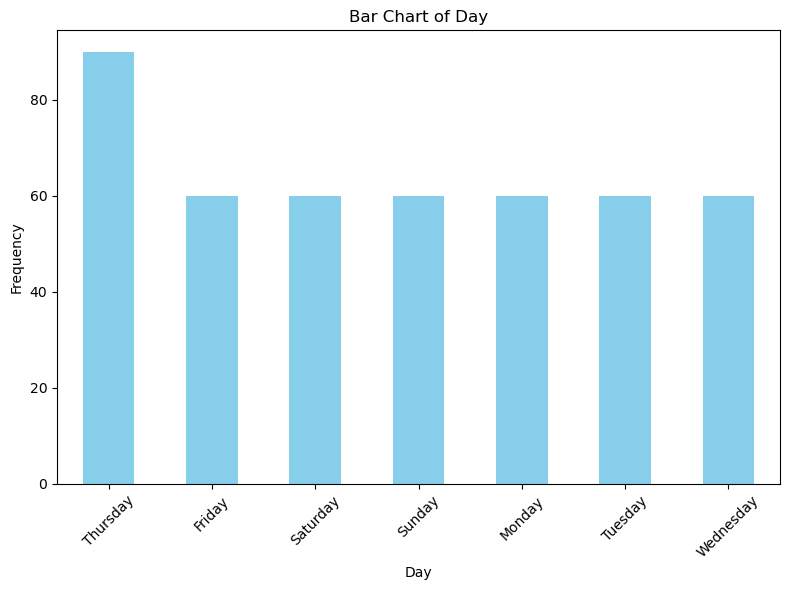

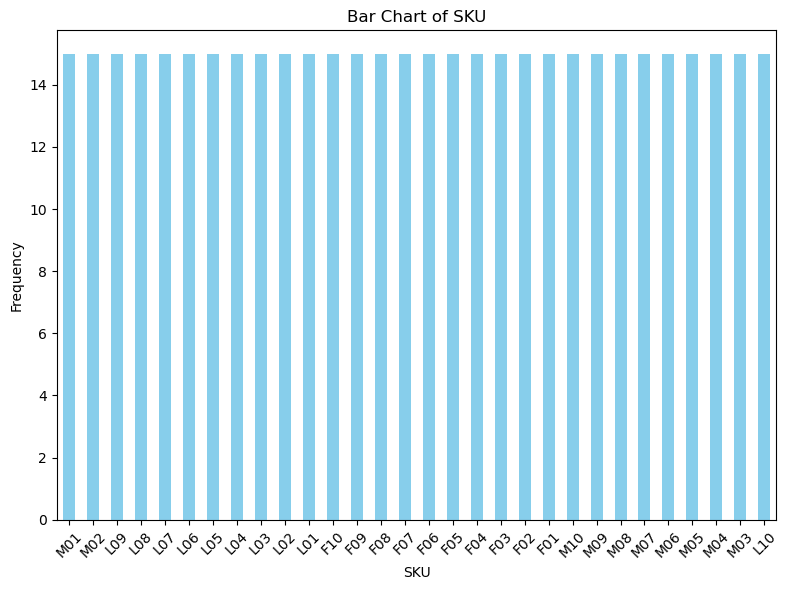

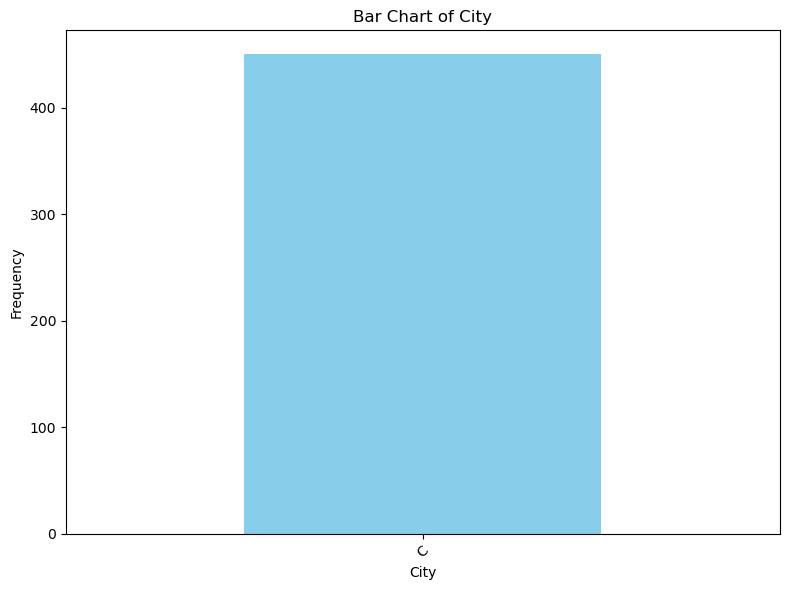

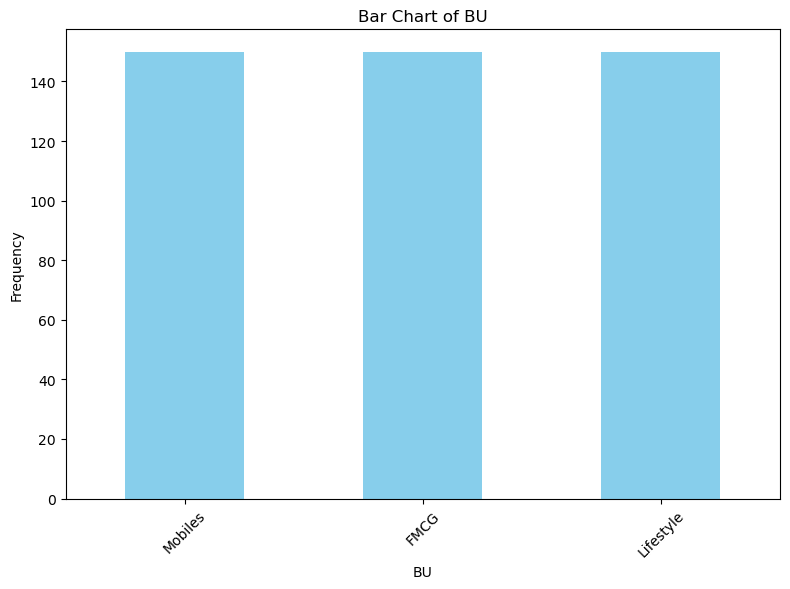

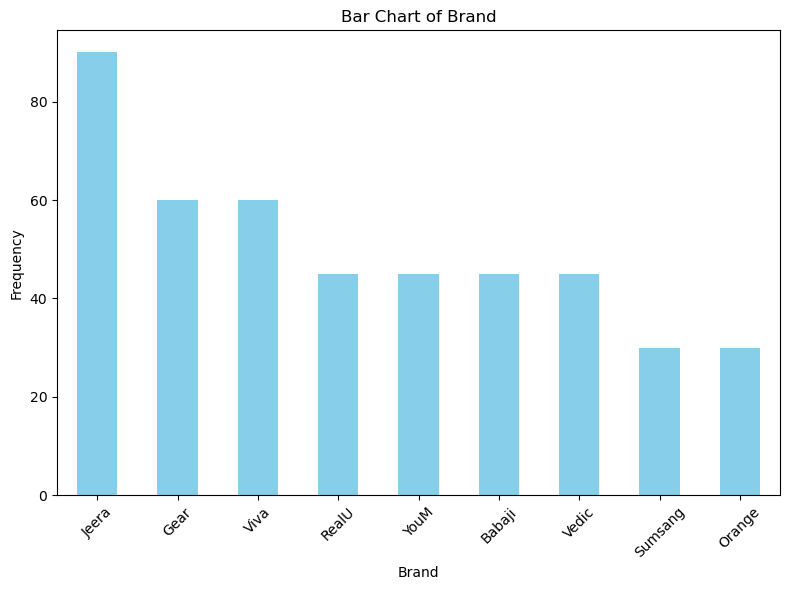

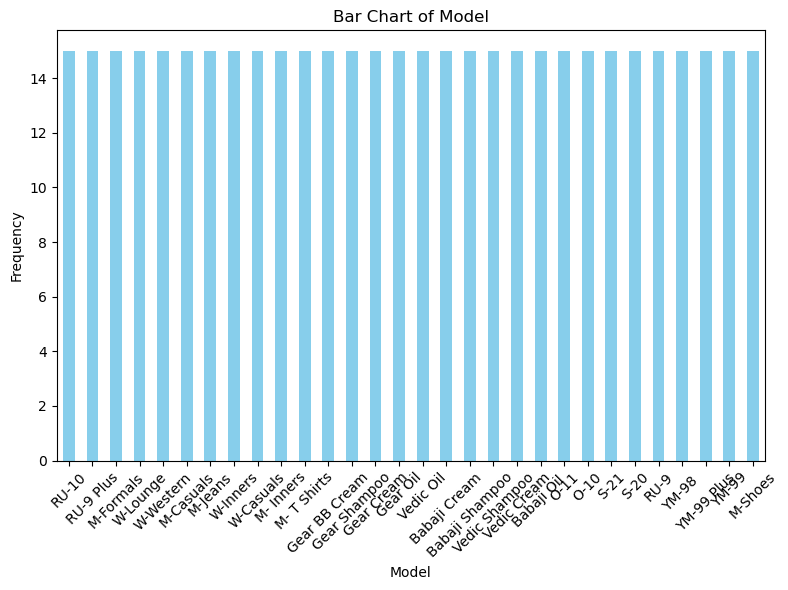

In [269]:
# Manually selected categorical columns from your dataset
categorical_columns = ['Day', 'City', 'BU', 'Brand', 'Model']

# Generate individual bar plots for each categorical column
for column in categorical_cols:
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()  # Apply tight layout for each individual plot
    plt.show()

# Standardization of Numerical Colums

In [ ]:
# Standardization Using Z-Score:

# We use StandardScaler() from sklearn.preprocessing, which applies Z-score normalization by subtracting the mean and dividing by the standard deviation.
# The scaled data is stored in a new DataFrame called df2.

In [273]:
scaler = StandardScaler()

In [279]:
scaler.fit_transform(df[numerical_cols])

array([[ 2.35002911,  0.091173  ,  2.92572115, -0.83028851,  3.95281631,
         2.80475594],
       [ 1.16712855, -0.01957016,  1.33099521, -0.85266145,  1.84901409,
         1.2710262 ],
       [ 0.45738822,  0.31265934,  1.56277525, -1.35163138,  1.62299458,
         1.54567497],
       ...,
       [-0.72551234, -0.49022863, -0.60644824,  0.90379261, -0.60813967,
        -0.60192115],
       [-0.48893223, -0.47361715, -0.55692259,  0.38847428, -0.53037877,
        -0.55549857],
       [-0.96209245, -0.40717125, -0.60842926,  0.04223476, -0.63734468,
        -0.60123949]])

In [281]:
# Lets make it into dataframe 

df2=pd.DataFrame(scaler.fit_transform(df[numerical_cols]),columns=numerical_cols)
df2

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


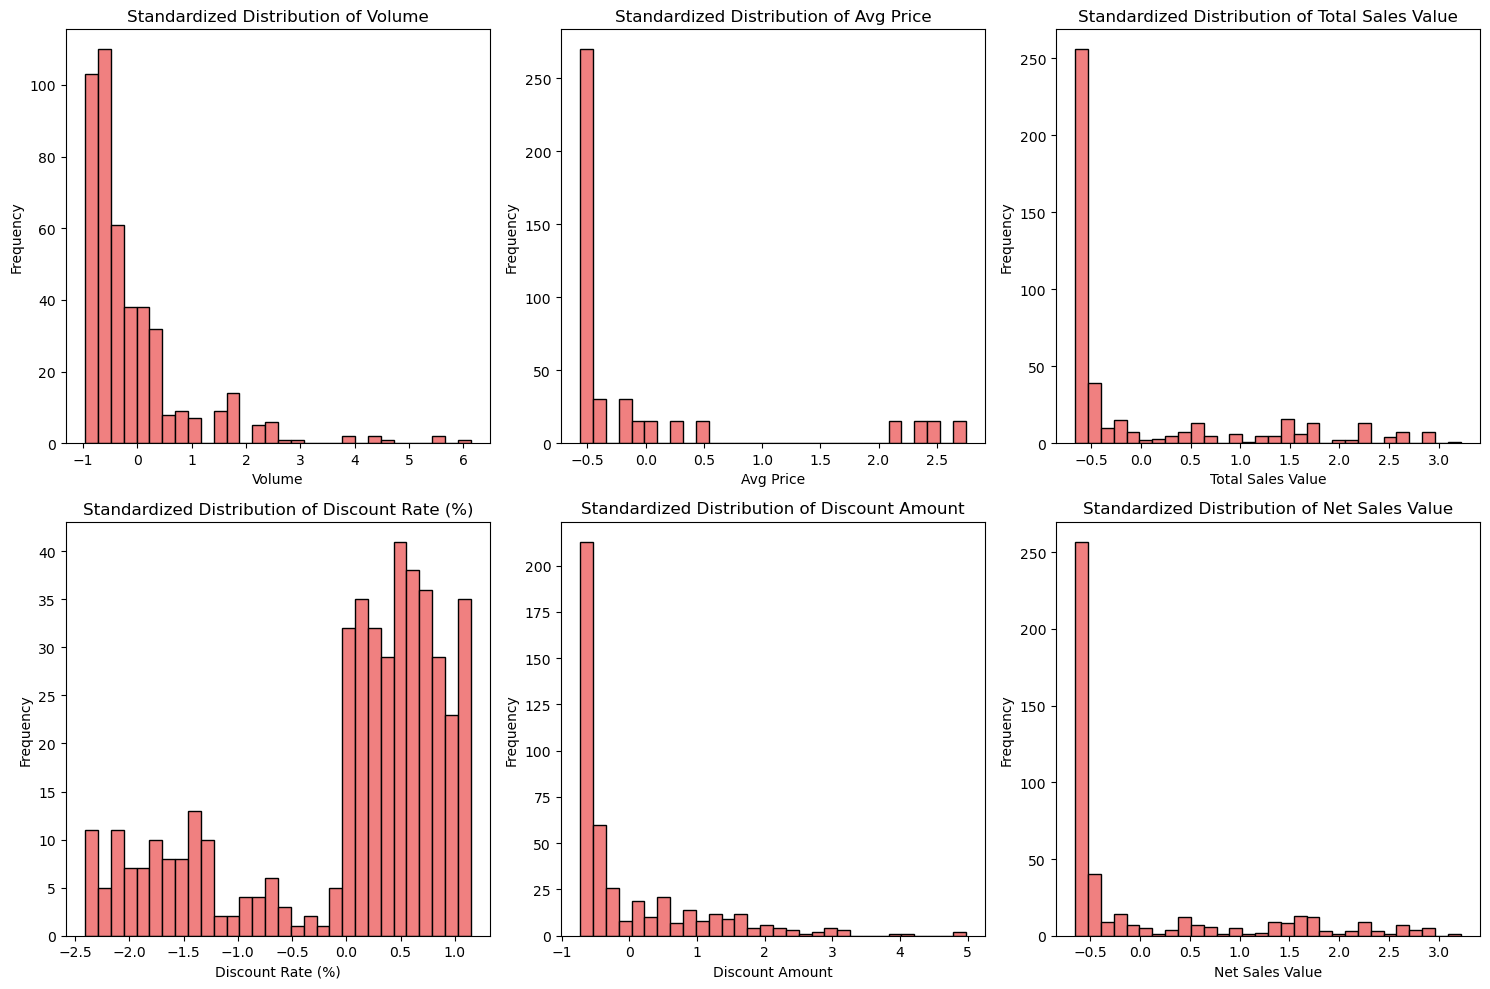

In [287]:
#Displaying the standardized distributions (after standardization)
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df2[column], bins=30, color='lightcoral', edgecolor='black') #link for colors:https://matplotlib.org/stable/gallery/color/named_colors.html
    plt.title(f'Standardized Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [295]:
# Display before and after comparison of data distribution

print("Original Sales Data (First 5 Rows):", df[numerical_cols].head())

print("Standardized Data (First 5 Rows):", df2.head())

Original Sales Data (First 5 Rows):    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
Standardized Data (First 5 Rows):      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.

In [297]:
# Combine the original and standardized data for comparison

comparison_df = pd.DataFrame()

# Add original and standardized columns side-by-side
for column in numerical_cols:
    comparison_df[f'{column}_Original'] = df[column]
    comparison_df[f'{column}_Standardized'] = df2[column]

# Display the first 10 rows for comparison
print("Comparison of Original vs Standardized Data (First 10 Rows):\n")
print(comparison_df.head(10))

Comparison of Original vs Standardized Data (First 10 Rows):

   Volume_Original  Volume_Standardized  Avg Price_Original  \
0               15             2.350029               12100   
1               10             1.167129               10100   
2                7             0.457388               16100   
3                6             0.220808               20100   
4                3            -0.488932                8100   
5                3            -0.488932                8100   
6                3            -0.488932               49100   
7                2            -0.725512               54100   
8                2            -0.725512               55100   
9                3            -0.488932               60100   

   Avg Price_Standardized  Total Sales Value_Original  \
0                0.091173                      181500   
1               -0.019570                      101000   
2                0.312659                      112700   
3               

# Conversion of Categorical Data into Dummy Variables

In [302]:
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [304]:
# Apply One-Hot Encoding to the categorical columns
# We use pd.get_dummies() to automatically convert these categorical columns into a series of binary columns.

encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)
encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [318]:
print("Transformed Dataset (First 10 Rows):\n\n") #\n spacing betwwn line
print(encoded.head(10))

Transformed Dataset (First 10 Rows):


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   
5       3       8100              24300          16.996489      4130.146805   
6       3      49100             147300           9.228812     13594.039719   
7       2      54100             108200           5.553719      6009.124321   
8       2      55100             110200           7.410104      8165.935144   
9       3      60100             180300           9.928444     17900.983733   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180

# Conclusion

In [ ]:
#Numerical Data Insights:

#Mean, Median, Mode, and Standard Deviation: These basic statistics provided insights into the central tendency and dispersion of the numerical columns

# Distributions:
# Histograms showed that some numerical variables like Discount Rate (%) were skewed, indicating that most discounts clustered around specific values, with a few extreme values.

# Boxplots revealed the presence of outliers in variables such as Net Sales Value

In [ ]:
# Categorical Data Insights:

# Bar Charts: The distribution of categorical variables like City, BU, Brand, and Model displayed patterns of frequency,-
# -highlighting the most common categories

#Outliers:

# Boxplots helped in identifying outliers in the dataset, which can be important for decision-making

In [323]:
# Standardization:

#Standardizing the numerical columns ensures that all variables contribute equally to the model.

In [ ]:
# One-Hot Encoder:
# Categorical data, which contains non-numerical values (like 'City' or 'Brand'), must be transformed into a format that
# machine learning algorithms can understand.

In [ ]:
# Properly preprocessed data (standardized and one-hot encoded) allows machine learning models to converge faster
# and improve performance.

In [ ]:
# Data preprocessing techniques like standardization and one-hot encoding are crucial steps in transforming raw data into a-
# -suitable format for analysis and machine learning.

# ______THANK YOU______